In [1]:
import numpy as np

In [4]:
x = np.array([1, 2, 3, 4, 5])
x>3

array([False, False, False,  True,  True])

In [6]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

# 1つのndarrayの保存

In [ ]:
data = np.array([1, 2, 3])
np.save("datafile.npy", data)

In [8]:
d = np.load("datafile.npy")
d

array([1, 2, 3])

# 複数のndarrayの保存

In [28]:
x = np.array([1,2,3])
y = np.array([4,5,6])
np.savez("datfile2.npz", a=x, b=y)

In [30]:
d = np.load("datfile2.npz")
print(d.files)
print(d["a"])


['a', 'b']
[1 2 3]


# matplotlib

In [31]:
import matplotlib.pyplot as plt

In [37]:
x = np.arange(-3, 3.5, 0.5) #(start, end, step)
x

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

In [38]:
x = np.linspace(-3, 3, 10) #(start, end, division-num)
x

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [39]:
print(np.round(x, 2))

[-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]


In [42]:
def f(x):
    return (x-2)*x*(x+2)
def f2(x):
    return (x-1)*x*(x+2)

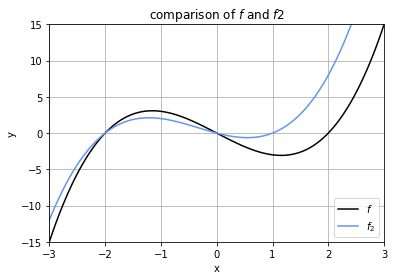

In [53]:
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x), color="black", label="$f$")
plt.plot(x, f2(x), color="cornflowerblue", label="$f_2$")
plt.legend(loc="lower right")
plt.title("comparison of $f$ and $f2$")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-3, 3)
plt.ylim(-15, 15)
plt.grid()
plt.show()

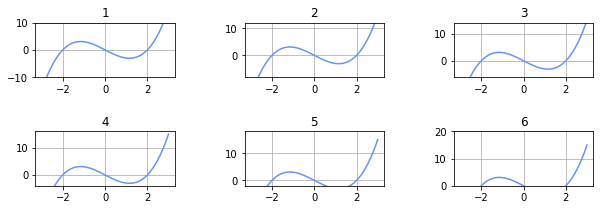

In [59]:
plt.figure(figsize=(10,3)) # 全体のサイズ
plt.subplots_adjust(wspace=0.5, hspace=1) #グラフの間隔
for i in range(6):
    plt.subplot(2, 3, i+1) #分割形状 
    plt.title(i+1)
    plt.plot(x, f(x), "cornflowerblue")
    plt.ylim(-10- -2*i, 10+2*i)
    plt.grid()
plt.show()

# 3次元グラフ

In [125]:
def f3(x, y):
    return (2*x**2 + y**2) * np.exp(-(2*x**2 + y**2))

In [131]:
xn, yn = 50, 50 
x0 = np.linspace(-2, 2, xn)
y0 = np.linspace(-2, 2, yn)
z = np.zeros((yn, xn))

for xi in range(xn):
    for yi in range(yn):
        z[yi, xi] = f3(x0[xi], y0[yi]) # zの引数の順番に注意

print(np.round(z, 1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


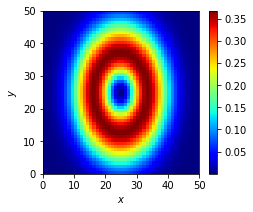

In [132]:
plt.figure(figsize=(3.5,3))
plt.jet()
plt.pcolor(z)
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Text(0, 0.5, '$y$')

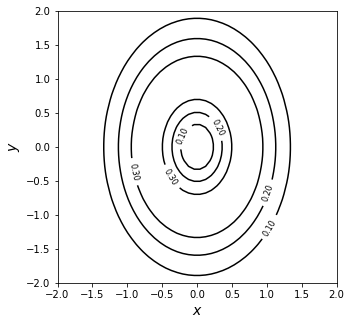

In [129]:
xx0, yy0 = np.meshgrid(x0, y0) #グリッド座標
zz = f3(xx0, yy0) # グリッド座標を使うとfor文使わずにzが計算できる。行列として各要素ごとに計算が行われる。
plt.figure(figsize=(5,5))
cont = plt.contour(
    xx0, yy0, zz, 
    levels=3,
    colors="black",
)
cont.clabel(fmt="%.2f", fontsize=8) #等高線に数値を入れる
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)


In [130]:
np.meshgrid(x0, y0)

[array([[-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        ...,
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ],
        [-2.        , -1.91836735, -1.83673469, ...,  1.83673469,
          1.91836735,  2.        ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.91836735, -1.91836735, -1.91836735, ..., -1.91836735,
         -1.91836735, -1.91836735],
        [-1.83673469, -1.83673469, -1.83673469, ..., -1.83673469,
         -1.83673469, -1.83673469],
        ...,
        [ 1.83673469,  1.83673469,  1.83673469, ...,  

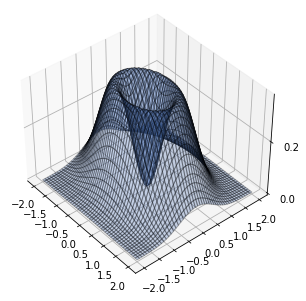

In [96]:


plt.figure(figsize=(5,5))
ax = plt.subplot(projection="3d") # 3Dグラフの準備
ax.plot_surface( # サーフェスの描画
    xx0, # x座標票
    yy0, # y座標
    z,
    rstride=1, # 何行おきに線を引くか
    cstride=1, # 何列おきに線を引くか
    alpha=0.3, # 面の透明度
    color="cornflowerblue",
    edgecolor="black",
)
ax.set_zticks((0, 0.2)) # z軸のメモリ
ax.view_init(40, -40)  # グラフの表示向き (上下回転:(0 真横、90:真上),横回転:(正:時計回り,負:半時計))
plt.show()

In [97]:
import matplotlib
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3